In [1]:
#The MNIST dataset from LeCun/Cortes/Burges is already preloaded in the keras module and will be used here
from tensorflow.python import keras
from keras.datasets import mnist 

#It is organized as a tuple of numpy arrays and split in training and test data for both the image data (X) and the labels (y)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Access information on dataset
help(mnist)

Using TensorFlow backend.


Help on module keras.datasets.mnist in keras.datasets:

NAME
    keras.datasets.mnist - MNIST handwritten digits dataset.

FUNCTIONS
    load_data(path='mnist.npz')
        Loads the MNIST dataset.
        
        # Arguments
            path: path where to cache the dataset locally
                (relative to ~/.keras/datasets).
        
        # Returns
            Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

FILE
    /anaconda3/lib/python3.6/site-packages/keras/datasets/mnist.py




In [2]:
import numpy as np
from skimage import img_as_float
from scipy import stats

#Inspect shape of arrays
print(X_train.shape)#60'000 samples of 28*28 pixel images of digits 0-9
print(y_train.shape)#corresponding labels

print(X_test.shape)#10'000 samples
print(y_test.shape)

#Number of labels (=10, from 0 to 9)
print(len(np.unique(y_train)))

#Flatten 3 dimensional arrays for use in analysis; 784 columns, one for each pixel (28*28)
X_train_data=X_train.reshape((60000,784))
X_test_data=X_test.reshape((10000,784))

print(X_train_data.shape)
print(X_test_data.shape)

#Transform data type to 'float64' which rescales data to range from 0 to 1 using skimage package 
#(see http://scikit-image.org/docs/dev/user_guide/data_types.html)
#Usually a good idea to normalize due to high dimensionality of dataset and wide range of original data type ('uint8':0-255)
X_train_data=img_as_float(X_train_data) 
X_test_data=img_as_float(X_test_data)

#Inspect the data type of the image data
print(X_train_data.dtype)
print(X_test_data.dtype)

#Inspect summary statistics on data set (not done here, because it produces long output)
#stats.describe(X_train_data)
#Can verify that range of values is from 0 to 255 which correspond to 'uint8' image data type

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
10
(60000, 784)
(10000, 784)
float64
float64


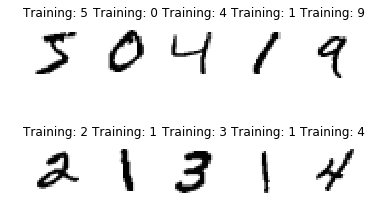

In [3]:
#Visualize target labels with an image

#Import matplotlib
import matplotlib.pyplot as plt
#Used within a Jupyter Notebook
%matplotlib inline 

#Join the images and target labels in a list
images_and_labels = list(zip(X_train, y_train))

#For every element in the list
for index, (image, label) in enumerate(images_and_labels[:10]):
    #Initialize a subplot of 2X5 at the i+1-th position
    plt.subplot(2, 5, index + 1)
    #Don't plot any axes
    plt.axis('off')
    #Display images in all subplots 
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    #Add a title to each subplot
    plt.title('Training: ' + str(label))

#Show the plot
plt.show()

(1000, 2)
[[ 0.79653555  1.32387588]
 [ 4.33401368  1.66947017]
 [ 0.0407237  -1.63687927]
 ...
 [ 3.01098989  0.75932589]
 [ 0.5810392   2.43564231]
 [-0.79666015  0.65230211]]


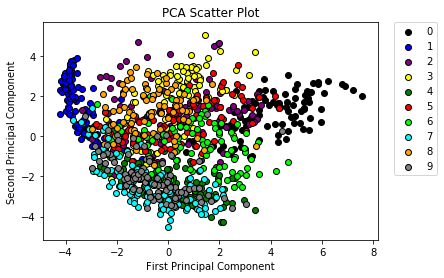

In [4]:
#Reduce dimensionality of input data by Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

#Create a Randomized PCA model that takes two components
randomized_pca = PCA(n_components=2, svd_solver='randomized')

#Fit and transform the data to the model; I limited the sample to keep tidyness in the plot
reduced_data_rpca = randomized_pca.fit_transform(X_train_data[:1000])

#Inspect the shape; only 2 column dimensions left
print(reduced_data_rpca.shape)

#Print out the data
print(reduced_data_rpca)


#Plot; I limited the sample to keep tidyness in the plot
colors = ['black', 'blue', 'purple', 'yellow', 'green', 'red', 'lime', 'cyan', 'orange', 'gray']
for i in range(len(colors)):#Iterate over all classes (digits) which are matched with a color from the list and then plotted
    x = reduced_data_rpca[:, 0][y_train[:1000] == i]
    y = reduced_data_rpca[:, 1][y_train[:1000] == i]
    plt.scatter(x, y, c=colors[i],edgecolors='black')
plt.legend(list(set(y_train)),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("PCA Scatter Plot")
plt.show()

#We can see that there is a lot of overlap which suggests that certain digits are fairly similar and that clustering might not be suited to classify the digits

In [5]:
#Preprocessing for Clustering

#Data Normalization
#Import
from sklearn.preprocessing import scale

#Apply `scale()` to the training data => Mean=0 and STD=1 for every attribute
X_train_scaled = scale(X_train_data)
X_test_scaled = scale(X_test_data)

#I use the training/test split that is already given from the dataset

#Inspect training and test data
#Number of training features
n_samples, n_features = X_train_scaled.shape

#Print out `n_samples`
print(n_samples)

#Print out `n_features`
print(n_features)

#Number of Training labels
print(len(np.unique(y_train)))

#Inspect `y_train`
print(len(y_train))


60000
784
10
60000


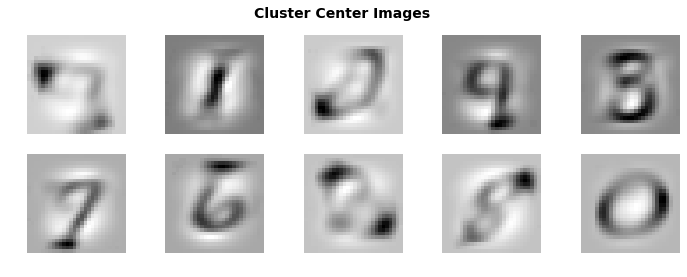

In [6]:
#Clustering

#Import the `cluster` module
from sklearn import cluster

#Create the K-Means model
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)

#Fit the training data to the model
clf.fit(X_train_scaled)

#Plot cluster centers

#Import matplotlib
import matplotlib.pyplot as plt
#Used within a Jupyter Notebook
%matplotlib inline 

#Figure size in inches
fig = plt.figure(figsize=(12, 4))

#Add title
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold')

#For all labels (0-9)
for i in range(10):
    # Initialize subplots in a grid of 2X5, at i+1th position
    ax = fig.add_subplot(2, 5, 1 + i)
    # Display images
    ax.imshow(clf.cluster_centers_[i].reshape((28, 28)), cmap=plt.cm.binary)
    # Don't show the axes
    plt.axis('off')

#Show the plot
plt.show()

#From the plot, we can already see that the cluster model has difficulties in identifying the digits, e.g. it doesn't seem to have a good cluster for the digit four or five

In [7]:
#Predict labels

#Predict the labels for `X_test`
y_pred=clf.predict(X_test_scaled)

#Print out the first 100 instances of `y_pred`
print(y_pred[:100])

#Print out the first 100 instances of `y_test`
print(y_test[:100])

#Study the shape of the cluster centers
clf.cluster_centers_.shape

#The bad classification performance is confirmed when we compare the predicitions with the true values

[5 7 1 6 3 1 3 0 8 5 9 6 3 4 1 4 3 5 7 3 5 6 3 8 3 9 3 3 4 1 4 1 4 9 5 2 0
 1 1 1 1 5 3 1 1 4 1 6 3 3 6 7 8 4 7 4 3 1 3 1 0 8 3 1 5 1 6 3 4 9 0 9 7 5
 1 3 4 7 1 5 3 6 7 3 3 3 5 4 6 1 4 6 1 4 1 3 1 1 6 3]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


(10, 784)

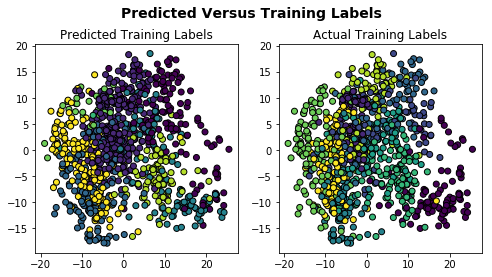

In [8]:
#Visualize Predictions

#Import `Isomap()`, another dimension reduction technique similar to PCA
from sklearn.manifold import Isomap

#Create an isomap and fit the `digits` data to it; I limited the sample to keep tidyness in the plot
X_iso = Isomap(n_neighbors=10).fit_transform(X_train_data[:1000])

#Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train_scaled[:1000])

#Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

#Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

#Add scatterplots to the subplots; I limited the sample to keep tidyness in the plot
ax[0].scatter(X_iso[:, 0], X_iso[:, 1],edgecolors='black', c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_iso[:, 0], X_iso[:, 1],edgecolors='black', c=y_train[:1000])
ax[1].set_title('Actual Training Labels')

#Show the plots
plt.show()

#Again, the coloring does not really match which means bad classification

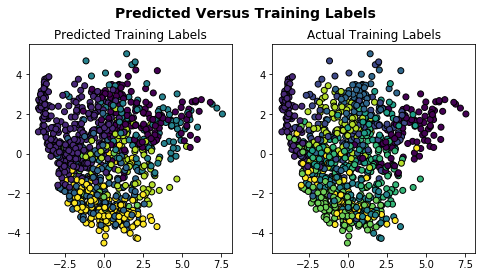

In [9]:
#Using PCA instead of Isomap

# Import `PCA()`
from sklearn.decomposition import PCA

#Model and fit the `digits` data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X_train_data[:1000])

#Compute cluster centers and predict cluster index for each sample
clusters = clf.fit_predict(X_train_scaled[:1000])

#Create a plot with subplots in a grid of 1X2
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

#Adjust layout
fig.suptitle('Predicted Versus Training Labels', fontsize=14, fontweight='bold')
fig.subplots_adjust(top=0.85)

#Add scatterplots to the subplots; I limited the sample to keep tidyness in the plot
ax[0].scatter(X_pca[:, 0], X_pca[:, 1],edgecolors='black', c=clusters)
ax[0].set_title('Predicted Training Labels')
ax[1].scatter(X_pca[:, 0], X_pca[:, 1],edgecolors='black',c=y_train[:1000])
ax[1].set_title('Actual Training Labels')

#Show the plots
plt.show()

In [10]:
#Evaluate the Clustering model

#Import `metrics` from `sklearn`
from sklearn import metrics

#Print out the confusion matrix with `confusion_matrix()`
print(metrics.confusion_matrix(y_test, y_pred))

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
print('% 9s' % 'inertia    homo   compl  v-meas     ARI AMI  silhouette')
print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          %(clf.inertia_,
      homogeneity_score(y_test, y_pred),
      completeness_score(y_test, y_pred),
      v_measure_score(y_test, y_pred),
      adjusted_rand_score(y_test, y_pred),
      adjusted_mutual_info_score(y_test, y_pred),
      silhouette_score(X_test_scaled, y_pred, metric='euclidean')))

#The bad classification performance of the k-means clustering is ultimately reflected in these metrics; Mis-classifications are the norm (higher entries off-diagonal) and the clustering goodness measures are also very low

[[   3    3  123    1  218    1   53   13   47  518]
 [   0 1098    1    1    2    0    3    3   27    0]
 [   9  150  268   19  102    6  120  341    9    8]
 [  19   79  144   13  608   17    8  108   13    1]
 [  53   77    2  574    0  115   17    9  124   11]
 [   5   62   37   41  313   21   12   22  372    7]
 [   0   54    3    9   15    0  751   56   16   54]
 [ 119   90    2  217    0  571    0    3   26    0]
 [   7  135   10   56  434   34   10   25  257    6]
 [  43   34    9  558   15  323    0    6   15    6]]
inertia    homo   compl  v-meas     ARI AMI  silhouette


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


538667   0.423   0.447   0.435   0.322   0.422    0.009
